In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##Load data and remove irrelevant variables

In [2]:
data = pd.read_csv("../02_data_preparation/pet_w_dummy_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14829 entries, 0 to 14828
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 14829 non-null  int64  
 1   first_purchase             14829 non-null  bool   
 2   shelf_price                14829 non-null  float64
 3   pct_disc                   14829 non-null  float64
 4   pct_retail_disc            14829 non-null  float64
 5   pct_coupon_disc            14829 non-null  float64
 6   display_1                  14829 non-null  int64  
 7   display_2                  14829 non-null  int64  
 8   display_3                  14829 non-null  int64  
 9   display_4                  14829 non-null  int64  
 10  display_5                  14829 non-null  int64  
 11  display_6                  14829 non-null  int64  
 12  display_7                  14829 non-null  int64  
 13  display_9                  14829 non-null  int

In [6]:
data.drop(labels=["Unnamed: 0"],
          axis = 1, inplace = True)

In [7]:
pd.set_option("display.max_columns", None)
data.describe(include = "all")

,first_purchase,shelf_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_A,mailer_C,mailer_F,mailer_H,mailer_L,marital_status_A,marital_status_B,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_19-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,income_100-124K,income_125-149K,income_15-24K,income_150-174K,income_175-199K,income_200-249K,income_25-34K,income_250K+,income_35-49K,income_50-74K,income_75-99K,income_Under 15K,hhsize_1,hhsize_2,hhsize_3,hhsize_4,hhsize_5+,campaign_8.0,campaign_13.0,campaign_15.0,campaign_18.0,campaign_24.0,campaign_26.0,campaign_30.0,description_TypeA,description_TypeB,description_TypeC
count,14829,14829.000000,14829.000000,14829.000000,14829.000000,14829.0,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.0,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000,14829.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.810344,0.129598,0.122220,0.007378,0.0,0.000067,0.001686,0.000135,0.004316,0.000135,0.000270,0.003507,0.0,0.018747,0.000135,0.000270,0.004788,0.000337,0.500371,0.128667,0.636860,0.039517,0.021242,0.085171,0.091914,0.178097,0.372244,0.200755,0.053207,0.162250,0.072695,0.052667,0.712388,0.048486,0.117270,0.300829,0.414121,0.061231,0.058062,0.010250,0.038438,0.058871,0.068852,0.003776,0.005462,0.111875,0.007485,0.214310,0.254029,0.171893,0.054758,0.284240,0.447636,0.173849,0.043900,0.050374,0.006002,0.023400,0.013487,0.006339,0.034662,0.003709,0.003776,0.043226,0.034662,0.013487
std,NaN,4.314955,0.146301,0.136544,0.050267,0.0,0.008212,0.041026,0.011613,0.065556,0.011613,0.016422,0.059115,0.0,0.135635,0.011613,0.016422,0.069031,0.018360,0.500017,0.334842,0.480921,0.194828,0.144195,0.279145,0.288915,0.382607,0.483419,0.400579,0.224453,0.368692,0.259645,0.223376,0.452665,0.214798,0.321753,0.458634,0.492586,0.239762,0.233868,0.100726,0.192258,0.235391,0.253210,0.061338,0.073708,0.315224,0.086196,0.410357,0.435329,0.377300,0.227514,0.451067,0.497267,0.378992,0.204881,0.218723,0.077241,0.151176,0.115352,0.079367,0.182928,0.060790,0.061338,0.203373,0.182928,0.115352
min,NaN,0.120000,0.000000,-0.000000,-0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

##Dummy model as benchmark

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [9]:
X = data.drop("first_purchase", axis = 1)
y = data["first_purchase"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify = y)

#Define and fit two strategies for dummy model

In [11]:
dummy_frequent = DummyClassifier(strategy = "most_frequent")
dummy_stratified = DummyClassifier(strategy = "stratified")

In [12]:
dummy_frequent.fit(X_train, y_train)
dummy_stratified.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

#Calculate metrics for both dummy models

In [13]:
y_pred_frq = dummy_frequent.predict(X_test)
y_pred_str = dummy_stratified.predict(X_test)

In [14]:
#metrics for dummy classifier / most frequent strategy
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_frq))

0.0
0.0
0.0
0.6854349291975725


C:\Users\Gabriele\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#metrics for dummy classifier / stratified strategy
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_str))

0.3225108225108225
0.3256830601092896
0.31939978563772775
0.5778826702629805


##Simple Classifier

In [16]:
clf = DecisionTreeClassifier()
cv = StratifiedShuffleSplit(n_splits = 5) 
f1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring = "f1" )
prec = cross_val_score(clf, X_train, y_train, cv=cv, scoring = "precision" )
rec = cross_val_score(clf, X_train, y_train, cv=cv, scoring = "recall" )
acc = cross_val_score(clf, X_train, y_train, cv=cv, scoring = "accuracy" )
print(f1.mean(), prec.mean(), rec.mean(), acc.mean())

0.5949064960379592 0.6790148009760533 0.49679144385026736 0.7723673125526538


In [17]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Hyperparameter tuning

In [18]:
import scipy

In [19]:
rand_params = {'max_depth': scipy.stats.randint(2,50), "min_samples_leaf": scipy.stats.randint(10,1000), 
               "min_samples_split": scipy.stats.randint(20,2000)}

In [20]:
rand_search = RandomizedSearchCV(clf, rand_params, n_iter=30, scoring = "f1", cv = cv)

In [21]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
                   estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000187A0701C70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001879F996910>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000187A07016D0>},
                   scoring='f1')

In [22]:
rand_search.best_score_

0.3906324153830953

In [23]:
rand_search.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_leaf=61, min_samples_split=379)

In [24]:
grid_params = {"max_depth":[10, 20, 30, 40, 50], "min_samples_leaf":[10, 20, 50, 100, 200, 300, 400, 500, 600, 800], 
               "min_samples_split":[25, 50, 100, 150, 200, 300, 400, 500]}

In [25]:
grid = GridSearchCV(clf, param_grid = grid_params, scoring = "f1", cv = cv)

In [26]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [10, 20, 50, 100, 200, 300, 400,
                                              500, 600, 800],
                         'min_samples_split': [25, 50, 100, 150, 200, 300, 400,
                                               500]},
             scoring='f1')

In [27]:
grid.best_score_

0.5797575933793642

In [28]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=50, min_samples_leaf=10, min_samples_split=25)

Validation

In [29]:
from plotting import plot_learning_curve, plot_validation_curve

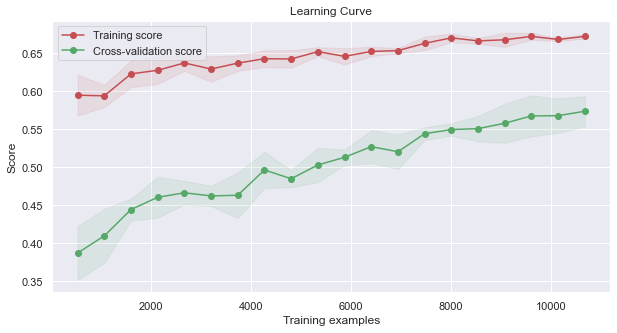

In [30]:
learning_curve = plot_learning_curve(grid.best_estimator_, X_train, y_train, cv = cv,  
                          train_sizes = np.linspace(.05, 1, 20), scoring = "f1")           

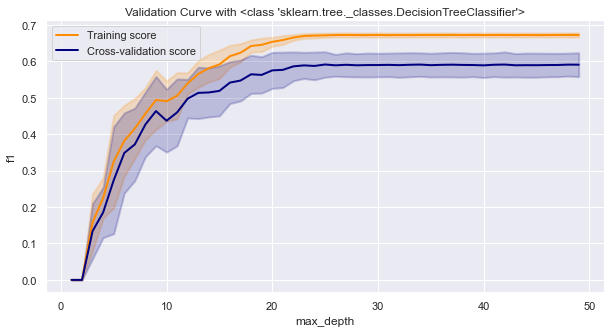

In [31]:
val_max_depth = plot_validation_curve(grid.best_estimator_, X_train, y_train, cv = cv, 
                                      param_name ="max_depth", param_range = np.arange(1,50,1), scoring = "f1")

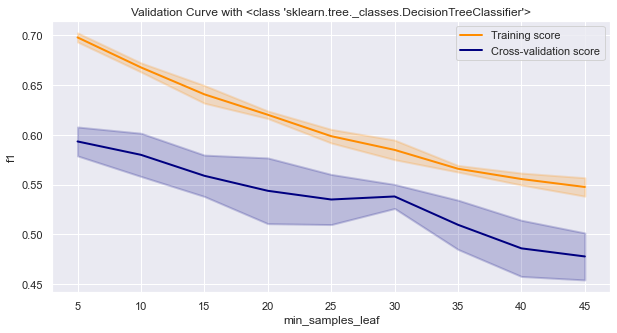

In [32]:
val_min_samples_leaf = plot_validation_curve(grid.best_estimator_, X_train, y_train, cv=cv,
                                             param_name="min_samples_leaf", param_range = np.arange(0, 50, 5), scoring = "f1")

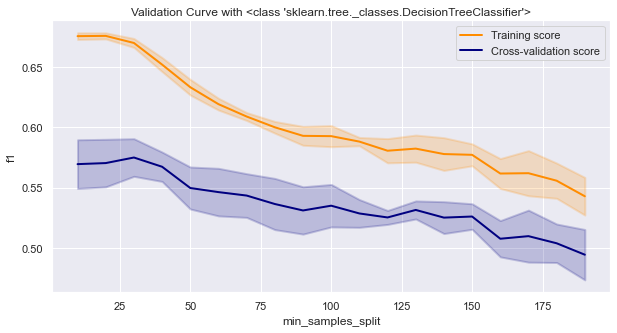

In [33]:
val_min_samples_split = plot_validation_curve(grid.best_estimator_, X_train, y_train, cv=cv,
                                              param_name = "min_samples_split", param_range = np.arange(0,200,10), scoring="f1")

In [34]:
fav_model = DecisionTreeClassifier(max_depth = 25, min_samples_leaf = 10, min_samples_split = 25)
fav_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, min_samples_leaf=10, min_samples_split=25)

In [35]:
f1 = cross_val_score(fav_model, X_train, y_train, cv=cv, scoring = "f1" )
prec = cross_val_score(fav_model, X_train, y_train, cv=cv, scoring = "precision" )
rec = cross_val_score(fav_model, X_train, y_train, cv=cv, scoring = "recall" )
acc = cross_val_score(fav_model, X_train, y_train, cv=cv, scoring = "accuracy" )
print(f1.mean(), prec.mean(), rec.mean(), acc.mean())

0.5583400369038329 0.6285809395403572 0.5064171122994653 0.7440606571187869


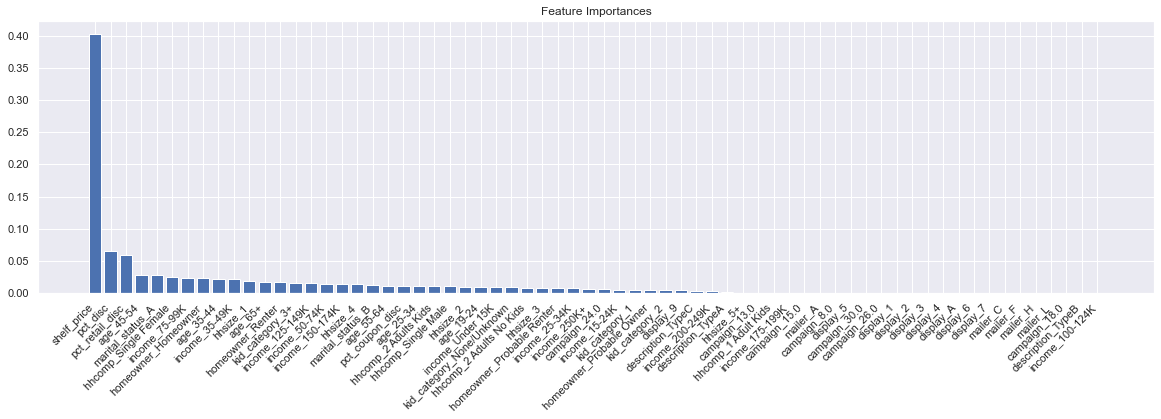

In [36]:
importances = fav_model.feature_importances_

indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature names
# I have my original names list of feature names, which corresponds to the features in the tree.
f_names = [X.columns [i] for i in indices]

#create my plot
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title("Feature Importances")
axes.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
axes.set_xticks(range(X.shape[1]));
axes.set_xticklabels(f_names, rotation=45, ha='right');
